## TEAM MsC Course - NTUA
### Biostatistics & Machine Learning
###1st student assignement
##### Academic Year 2023-24



# ⚠️
`It should be pointed out that it is forbidden to post the solutions of the assignment on github, or on other websites. The design and content of the assignments are the intellectual property of the teaching staff of the course.`

 `⚠️ The provided dataset must not be enriched in any way. Submisisons that will use enriched data sets will not be graded.`

Student Name: Ioannis Charalampous

ID: 03500053

### 1. Dataset import

We will be using the [Healthcare Diabetes Dataset](https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes). Download it from [this link](https://drive.google.com/file/d/1qkPVFW6Tv9dDXCQjpnftq_Qer3mPUGpk/view?usp=sharing) and import it into this notebook. Then split it on a training and a test set using the *train_test_split()* method from the submodule model_selection of sci-kit learn, after you perform the Exploratory Data Analysis Steps of Section 2. Use the last three digits of your ID number as the `random_state` parameter to *train_test_split()*




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

data = pd.read_csv("C:/Users/giannos/Desktop/Healthcare-Diabetes.csv")

### 2. Exploratory Data Analysis (EDA)

Use code cells with the appropriate EDA techniques to inspect the data set and text cells to explain the results. You may use more code and text ce

Using the appropriate methods, write the relevant code to answer the following questions:

2a. the number of samples and features of the data set

2b. the type of the features of the data set,

2c. the attribute labels,

2d. the number of categories,

2e. how many samples belong to each category,

2f. the correlation between the data,

2g. any other analysis you find useful for understanding the data set.

In [2]:
# 2a.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [3]:
# The dataset has 2768 rows (samples) and 10 columns from which the 8 columns from 1 to 8 in the display are the features. 
# The first column Id is the id number of each sample which is the unique identifier for every sample and has no value in the classification
# and will be excluded and the last column Outcome is the labels of the dataset.
# The columns "Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age" are the features.

In [4]:
# 2b.
data.head

<bound method NDFrame.head of         Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
3        4            1       89             66             23       94  28.1   
4        5            0      137             40             35      168  43.1   
...    ...          ...      ...            ...            ...      ...   ...   
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1  

In [5]:
# We can see from the functions info() and head that all the features have numerical values. 
# All the features are integers instead of the features BMI and DiabetesPedigreeFunction that are floats.

In [6]:
# 2c.
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [7]:
for i in data["Outcome"]:
    if i>1 or i<0:
        flag='not binary'
    else:
        flag='binary'
print(flag)

binary


In [8]:
# The above cells show that every value of the column Outcome has only 0 and 1 values (binary).
# So the atributte labels which is the column Outcome has two possible values 0 or 1 

In [9]:
# 2d.
#  The categories are the values of the column Outcome 0 or 1
# Category 0 is when the patient didn't have diabetes
# Category 1 is when the patient had diabetes

In [10]:
# 2e.

ones=0
zeros=0
for i in data["Outcome"]:
    if i==1:
        ones+=1
    else:
        zeros+=1
print("Category 0 : ",zeros)
print("Category 1 : ",ones)

Category 0 :  1816
Category 1 :  952


In [11]:
# From the above cell that counts the samples of each category we can see that Category 0 has 1816 samples and Category 1 has 952 samples to a total of 2768 samples.

In [12]:
# 2f. 

data.corr()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,1.000000,-0.024222,0.015010,0.009717,0.017702,0.007359,0.024007,-0.009695,-0.007404,-0.006298
Pregnancies,-0.024222,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.015010,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.009717,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,0.017702,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,0.007359,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.024007,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.009695,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,-0.007404,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,-0.006298,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


<AxesSubplot: >

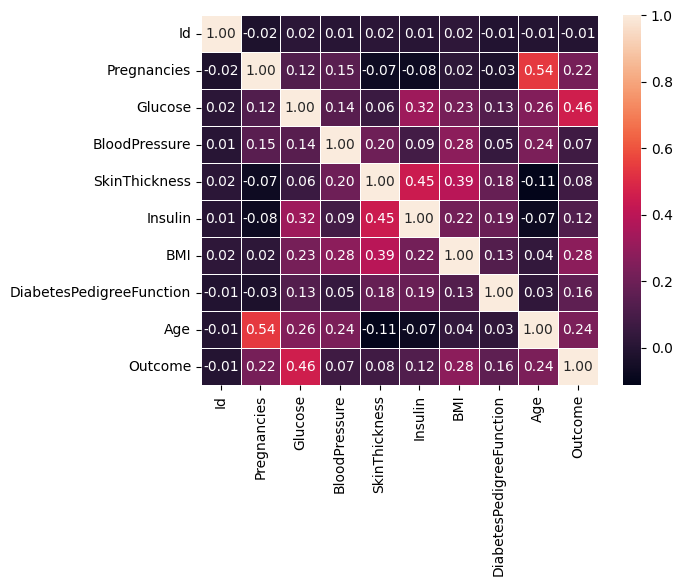

In [13]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidth=.5)

In [14]:
# With the above code we can see the heatmap of the correlations between all the data columns. First I observe that the column Id has no correlation with the rest of the data 
# as it was expected because the Id is just the  identification number of each sample and is not a health measurement, so it will be deleted later on.
# We can also observe that the columns Age and Pregnancies have a really high correlation, which can be interpreted biologically as when women age they might have a 
# higher likelyhood of experiencing pregnancies thus creating a higher correlation between the variables.
# The most importance result though is the relatively high correlation between the columns Glucose and Outcome, implies a strong statistical relationship between them.
# That means that the feature Glucose can contribute significantly for distinguishing between different Outcome classes and should be utilized in the classification.

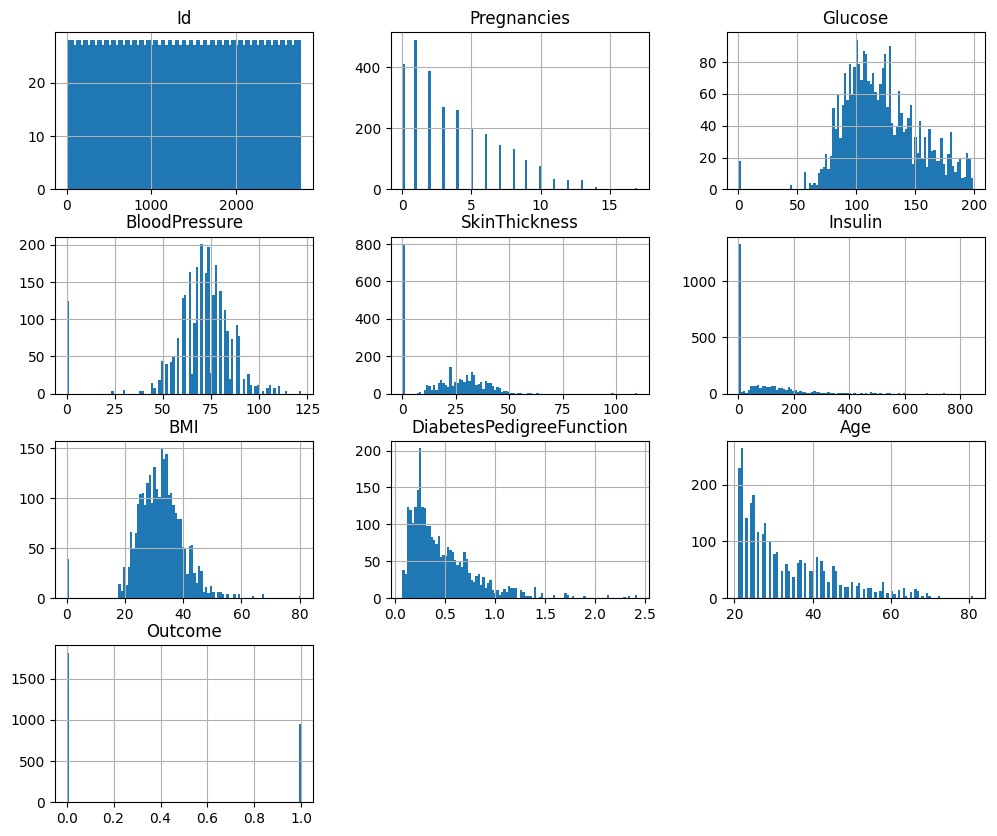

In [15]:
# 2g.

data.hist(bins=100, figsize=(12,10))
plt.show()

In [16]:
data.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [17]:
# For understanding the dataset better the above code show the histogram of each column and some statistical information like mean and std of each variable.
# From the histograms we can see that most feature variables that are biological markers (Glucose, Insulin, etc.) have zero values that is biologically impossible 
# so that indicates that there are missing values hidden as 0 values that need to be handled later on.
# Also we can see from both the histograms and the max row of the function describe() outlier values that can affect negatively the classification models later on 
# They might bias the models or decrease their performance and in general have a bad classification and need to be handled with scaling. 

### 3. Data Preprocessing
💡`Use the Column Transformer in order to create and apply different transformations for the numerical and categorical data.`




In [18]:
train, test = train_test_split(data, test_size=0.3, random_state=53)

3.a. Will you use all the features of the dataset to train the classifiers, or will you select some of them? Will you be combining some features to create new features for your model?

In [19]:
data=data.drop(["Id"], axis=1)

In [20]:
# As explained in the correlation heatmap the feature column Id should be deleted from the dataset as it is just an identification for the subjects and has no meaning in the diabetes experiment.
# Also the columns that had high correlation like Pregnancies-Age could be combined but because they are different biological markers i will choose not to cause
# they will lose their individual effects on the classification models and the models will be less interpretable.    
# So the features that will be selected are the columns "Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age" .

3.b. Are there any missing values? Write the appropriate code to handle these values.

In [21]:


# number of duplicate rows
duplicate_rows = data[data.duplicated()]
num_duplicates = len(duplicate_rows)

print("Number of duplicate rows:", num_duplicates)

#cleaned_data = data.drop_duplicates()

# null counts for each column
print("Number of null values in each column:")
print(data.isnull().sum())

# zero counts for each feature column
zero_counts = (data == 0).sum(axis=0)

print("Number of zero values in each column:")
print(zero_counts)


# impute 0 values with mean
columns_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]


imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean', fill_value=np.nan) )
])

data.loc[:, columns_to_impute] = data[columns_to_impute].replace(0, np.nan)

imputed = imputer.fit_transform(data[columns_to_impute])
data[columns_to_impute] = imputed



Number of duplicate rows: 1990
Number of null values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of zero values in each column:
Pregnancies                  412
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1816
dtype: int64


In [22]:
#First it is tested if the dataset has any duplicated rows. It has 1990 duplicated rows out of 2768 rows. 
# Because the duplicates are significantly large and if I delete them 
# there will not be sufficient data to for the classifier to generalize well to unseen data thus giving bad accuracies. So i choose to not delete them.

#Then on the above code it is tested if the dataset has any null values (missing values), which has none.
#Lastly the number of 0 values(missing values in our case) are counted on the features cause it is impossible for a person to have 0 on a biomarker such as Insulin. 
# The only feature that it is allowed to have 0 values is the number of Pregnancies feature.
# All the 0 values except from the ones on the column Pregnancies are converted to null and then an imputer is employed to change all null values with the mean value in each column.
# The mean is imputed on all the columns cause it is the best imputed value when we are dealing with numerical values. 

In [57]:
zero_count = (data == 0).sum(axis=0)

print("Number of zero values in each column:")
print(zero_count)

Number of zero values in each column:
Pregnancies                  412
Glucose                        0
BloodPressure                  0
SkinThickness                  0
Insulin                        0
BMI                            0
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1816
dtype: int64


In [24]:
# This cell tests if the columns still have 0 values and if the feature Pregnancies and the labels Outcome still have the same amount of 0 values.

3.c. Write the appropriate code to convert the categorical variables so that the classifiers you use can handle them.

In [25]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,154.23783,33.6,0.627,50.0,1
1,1,85.0,66.0,29.000000,154.23783,26.6,0.351,31.0,0
2,8,183.0,64.0,29.289634,154.23783,23.3,0.672,32.0,1
3,1,89.0,66.0,23.000000,94.00000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.000000,168.00000,43.1,2.288,33.0,1


In [26]:
# We can see that all the features have numerical values so there is no categorical values to convert.
# The labels Outcome are categorical but they are already encoded in binary encoding so there is no need to handle them.

3.d. Write code for feature scaling if you find it necessary

In [27]:
features = data.drop(["Outcome"], axis=1)

scaler = Pipeline(steps=[
    ('scaler', StandardScaler())
])

scaled = scaler.fit_transform(features)

In [28]:
# The features of the dataset are scaled with the standard scaler so that they have mean 0 and standard deviation of 1
# This scaling centers the data and eliminates any bias. Also with the standard deviation of 1 
# the sample points are spread not too close and not too far so all the features have the same relative importance, thus improving the classification performance.

3.e. Perform all the previous pretraining steps (using transformations) so that the initial set is "clean" to be used for training the classifiers.

In [29]:
train = train.drop(["Id"], axis=1) 

# preprocessing steps imputation and scaling
columns_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

numerical_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean', fill_value=np.nan) ),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_columns)])

# replace 0 with null on selected columns
train.loc[:, columns_to_impute] = train[columns_to_impute].replace(0, np.nan)
# preprocessing
train_pre = preprocessor.fit_transform(train)

In [30]:
# In this section all the preprocessing steps are performed on the train set with the column transformer 'preprocessor'.
# Only a numerical transformer is used because we have only numerical features. The features are imputed and scaled.
# For the imputation on all the columns except from Pregnancies the zero values are transformed into null values so that the imputer 
# will replace them with the corresponding mean value.

In [31]:
test = test.drop(["Id"], axis=1)

test.loc[:, columns_to_impute] = test[columns_to_impute].replace(0, np.nan)

test_pre = preprocessor.transform(test)

In [32]:
# In this cell the test set is transformed using the preprocessor of the train set with the parameters of the train set.
# This is performed so that the test set has a compatible form for the classifiers to understand and we have no bias into the evaluation.

3.f. After "cleaning" the initial training set, write the appropriate code to generate the $X$ and $y$ sets from the initial training set.

In [33]:
X=train_pre 
y=train['Outcome']

X_test = test_pre
y_test = test['Outcome']

print(X.shape)
print(y.shape)

print(X_test.shape)
print(y_test.shape)


(1937, 8)
(1937,)
(831, 8)
(831,)


In [34]:
# In this section the X (features) and y (labels) are initialized for the train set and the X_test, y_test for the test set.
# And their matrix sizes are printed to test if the amount of features and labels are correct.

3.g. Furtrher Divide the training set into a training set and a validation set (the split should be 70% train set and 30% validation set). Again, pass to the `random_state` parameter of the *train_test_split()* method the last three digits of your student ID number.

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3, random_state=53)

In [ ]:
# We further split the train set into train set (X_train, y_train) and validation set (X_val, y_val)

### 4. Train models with default hyper-parameters

We will train the following classifiers with our training data set:
1. Naive Bayes
2. KNeighborsClassifier
3. MLP with only **one** hidden layer
4. Decision Tree
5. Random Forest


In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score,accuracy_score

gnb = GaussianNB()
neigh = KNeighborsClassifier()
mlp = MLPClassifier()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [37]:
# In this cell the classifiers Naive Bayes, KNeighbors, MLP, Decision Tree, Random Forest are initialized with their default parameters in this order.
# The classifier MLP sets as default one hidden layer.

 4.a. Train (fit) all the 5 classifiers mentioned above on the training set, using the default values for all their hyper-parameters.

In [38]:
gnb.fit(X_train, y_train)
neigh.fit(X_train, y_train)
mlp.fit(X_train, y_train)
dt.fit(X_train, y_train)
rfc.fit(X_train, y_train)

c:\Users\giannos\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomForestClassifier()

In [39]:
# In this cell all 5 classifiers are trained with the method fit() on the train set.

4.b. Predict the label of the samples of the test set on all trained models.

In [40]:
y_pred_gnb = gnb.predict(X_test)
y_pred_neigh = neigh.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

print('Naive Bayes accuracy:', gnb.score(X_test,y_test))
print('KNeighbors accuracy:', neigh.score(X_test,y_test))
print('MLP accuracy:', mlp.score(X_test,y_test))
print('Decision Tree accuracy:', dt.score(X_test,y_test))
print('Random Forest accuracy:', rfc.score(X_test,y_test))

Naive Bayes accuracy: 0.7689530685920578
KNeighbors accuracy: 0.7978339350180506
MLP accuracy: 0.8170878459687124
Decision Tree accuracy: 0.9578820697954272
Random Forest accuracy: 0.9602888086642599


c:\Users\giannos\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\giannos\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

In [41]:
# Here for all classifiers the labels for the test set are predicted.
# Also all the accuracies are printed for an initial evaluation.


4.c. Compare the output of each model against the corresponding test set labels and evaluate their performance using the F1 score.

In [42]:

f1_gnb = f1_score(y_pred_gnb, y_test, average="weighted")
f1_neigh = f1_score(y_pred_neigh, y_test, average="weighted")
f1_mlp = f1_score(y_pred_mlp, y_test, average="weighted")
f1_dt = f1_score(y_pred_dt, y_test, average="weighted")
f1_rfc = f1_score(y_pred_rfc, y_test, average="weighted")

print('Naive Bayes F1 score:', f1_gnb)
print('KNeighbors F1 score:', f1_neigh)
print('MLP F1 score:', f1_mlp)
print('Decision Tree F1 score:', f1_dt)
print('Random Forest F1 score:', f1_rfc)

Naive Bayes F1 score: 0.7703927439662271
KNeighbors F1 score: 0.7956837349346755
MLP F1 score: 0.8165607372657702
Decision Tree F1 score: 0.957664411079135
Random Forest F1 score: 0.9600835875888988


In [43]:
# In this cell the performance is evaluated with the f1 score metric on the predicted labels and the actual labels from the test set.
# The f1 score combines precision (the ability of the model to make accurate positive predictions) and recall (the ability of the model to find all positive instances)
# into a single score and is useful when dealing with imbalanced datasets, where one class has significantly more samples than the other.

4.d. Evaluate the overall performance of the models using a graph (eg histogram, bar plot) and comment on which model performed best.

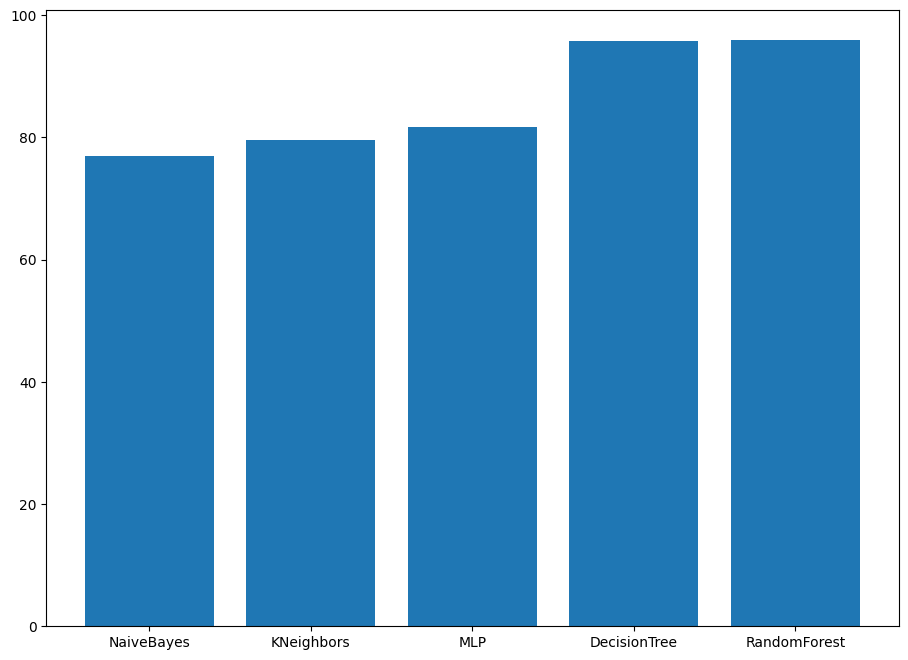

In [44]:

fig = plt.figure(figsize =(11, 8))

acc = [f1_gnb, f1_neigh, f1_mlp, f1_dt, f1_rfc]
acc = [item * 100 for item in acc]

model = ['NaiveBayes', 'KNeighbors', 'MLP', 'DecisionTree', 'RandomForest']
plt.bar(model, acc)

plt.show()

In [45]:
# The f1 score of all the classifiers is depicted through a bar plot.

# The Decision Tree and Random Forest classifiers as more complex models showed really good performance, with F1 scores of 0.957 and 0.96 
# and they showed that they are good at predicting diabetes and they fit this specific dataset well. 
# Also the MLP classifier with one hidden layer performed well with F1 score of 0.816, which shows it can capture complex patterns in the data. 
# But relatively low to the previous ones as it wasn't as complex as them.
# KNeighbors a relatively low complex model was similar with MLP with F1 score of 0.795, shows satisfactory results. 
# While Naive Bayes had a lower F1 score of 0.77 as it is the simpler classifier, it still remains a good option for this dataset. 

### 5. Model optimization through hyper-parameter tuning

5.a. For the 5 classifiers optimize their performance using grid search with cross-validation (k-fold 5) to find their  optimal hyper-parameter values.

In [46]:
from sklearn.model_selection import GridSearchCV,KFold 
import numpy as np

gnb = GaussianNB()
neigh = KNeighborsClassifier()
mlp = MLPClassifier()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()

param_grid_gnb = {'var_smoothing': np.logspace(0, -9, num=100)}
param_grid_neigh = {'n_neighbors': np.arange(1, 11, 2)}
param_grid_mlp = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (150,), (200,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd']
}
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
param_grid_rfc = {
    'n_estimators': [1,5,10],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


kfold = KFold(n_splits=5)

gs_gnb = GridSearchCV(gnb, cv=kfold, param_grid=param_grid_gnb)
gs_neigh = GridSearchCV(neigh, cv=kfold, param_grid=param_grid_neigh)
gs_mlp = GridSearchCV(mlp, cv=kfold, param_grid=param_grid_mlp)
gs_dt = GridSearchCV(dt, cv=kfold, param_grid=param_grid_dt)
gs_rfc = GridSearchCV(rfc, cv=kfold, param_grid=param_grid_rfc)


gs_gnb.fit(X_train, y_train)
gs_neigh.fit(X_train, y_train)
gs_mlp.fit(X_train, y_train)
gs_dt.fit(X_train, y_train)
gs_rfc.fit(X_train, y_train)


c:\Users\giannos\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\giannos\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1, 5, 10]})

In [47]:
# The code in this cell uses gridsearch with 5 fold cross validation to optimize the hyperparameters of each classifier.
# I searched the parameters of each classifier on sklearn and i found similar classification examples on stackoverflow so that i 
# choose the hyperparameters and their  values that gridsearch will search and after some experiments i choose the following parameters.

In [56]:
print('Naive Bayes :', gs_gnb.best_params_)
print('KNeighbors :', gs_neigh.best_params_)
print('MLP :', gs_mlp.best_params_)
print('Decision Tree :', gs_dt.best_params_)
print('Random Forest :', gs_rfc.best_params_)

Naive Bayes : {'var_smoothing': 0.8111308307896871}
KNeighbors : {'n_neighbors': 1}
MLP : {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (200,), 'solver': 'adam'}
Decision Tree : {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Random Forest : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [49]:
# Here we see the best values for the parameters of each classifier respectively.

# NaiveBayes, KNeighbors and MLP classifiers have different optimal parameters than their default ones.
# Also i keep one hidden layer on MLP on optimization as requested before and i only change the number of units 
# on the tuple parameter 'hidden_layer_sizes' the rows have different values but the columns have always value 1.

# DecisionTrees classifier has the same optimal parameters as the default parameters except from 'max_depth'.
# RandomForest has the same optimal as the default ones except from 'n_estimators' (number of trees)

# So in the DecisionTrees and RandomForest accuracies we will not see big changes in performance.
# On the other hand the optimized classifiers NaiveBayes, KNeighbors and MLP will have better prediction accuracies.

5.b. Feed the trained models with samples from the test set (predict)

In [50]:
y_pred_gnb = gs_gnb.best_estimator_.predict(X_test)
y_pred_neigh = gs_neigh.best_estimator_.predict(X_test)
y_pred_mlp = gs_mlp.best_estimator_.predict(X_test)
y_pred_dt = gs_dt.best_estimator_.predict(X_test)
y_pred_rfc = gs_rfc.best_estimator_.predict(X_test)

print('Naive Bayes best classifier accuracy:', gs_gnb.score(X_test,y_test))
print('KNeighbors best classifier accuracy:', gs_neigh.score(X_test,y_test))
print('MLP best classifier accuracy:', gs_mlp.score(X_test,y_test))
print('Decision Tree best classifier accuracy:', gs_dt.score(X_test,y_test))
print('Random Forest best classifier accuracy:', gs_rfc.score(X_test,y_test))

Naive Bayes best classifier accuracy: 0.7749699157641395
KNeighbors best classifier accuracy: 0.9554753309265944
MLP best classifier accuracy: 0.8339350180505415
Decision Tree best classifier accuracy: 0.9663056558363418
Random Forest best classifier accuracy: 0.9602888086642599


c:\Users\giannos\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\giannos\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

In [51]:
# Here for all classifiers the labels for the test set are predicted using the best classifier with optimized hyperparameters.
# Also all the accuracies are printed for an initial evaluation.

5.c. Compare the output of each model against the corresponding test set labels and evaluate their performance using the F1 score.

In [52]:
f1_gnb = f1_score(y_pred_gnb, y_test, average="weighted")
f1_neigh = f1_score(y_pred_neigh, y_test, average="weighted")
f1_mlp = f1_score(y_pred_mlp, y_test, average="weighted")
f1_dt = f1_score(y_pred_dt, y_test, average="weighted")
f1_rfc = f1_score(y_pred_rfc, y_test, average="weighted")

print('Naive Bayes best classifier F1 score:', f1_gnb)
print('KNeighbors best classifier F1 score:', f1_neigh)
print('MLP best classifier F1 score:', f1_mlp)
print('Decision Tree best classifier F1 score:', f1_dt)
print('Random Forest best classifier F1 score:', f1_rfc)

Naive Bayes best classifier F1 score: 0.786340073069099
KNeighbors best classifier F1 score: 0.9552058052164937
MLP best classifier F1 score: 0.8325739096497219
Decision Tree best classifier F1 score: 0.9661773260331882
Random Forest best classifier F1 score: 0.9603084743017483


In [53]:
# In this cell the performance is evaluated with the f1 score metric on the predicted labels and the actual labels from the test set using the best classifiers from grid search.

5.d. Evaluate the overall performance of the models using a graph (eg histogram, bar plot) and comment on which model performed best.

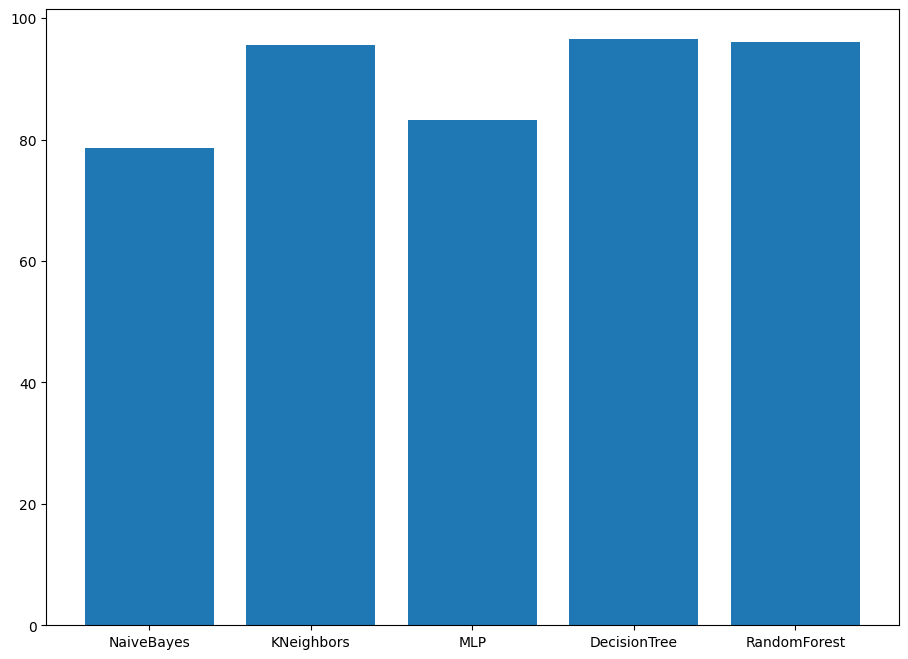

In [54]:
fig = plt.figure(figsize =(11, 8))

acc = [f1_gnb, f1_neigh, f1_mlp, f1_dt, f1_rfc]
acc = [item * 100 for item in acc]

model = ['NaiveBayes', 'KNeighbors', 'MLP', 'DecisionTree', 'RandomForest']
plt.bar(model, acc)

plt.show()

In [55]:
# The f1 score of all the classifiers is depicted through a bar plot.

# We can see that the classifiers Naive Bayes and MLP had a slight increase in their performance due to the new optimized hyperparamaters.
# The classifier K-nearest Neighbors had a significant increase in performance after the optimization with f1 score = 0.955 from 0.795. 
# That is because the parameter K (number of neighbors) is critical to balance the bias and variance of the model and thats why it is the only hyperparameter that was optimized.

# On the other hand we see after the tuning of the classifiers Decision Tree and Random Forest their hyperparameters remain almost the same.
# That is why we dont see an increase in performance.
# Still they have the best performance together with the optimized KNeighbors with the highest the Decision Tree with f1 score = 0.966. 
# Following the Random Forest with f1 score = 0.96.